<h1> <font color ='green'>Lead Scoring Case Study </font> </h1>

<h3> <font color ='red'>Accomplished by: Arjun Singh Baghel </font></h3>
                                                                            

<h2> <font color ='red'>Problem Statement:</font> </h2>
    
<p style="font-family: Calibri body"> An education company named <b>X Education</b> sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses.

 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos.
        
<b> When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals.</b> 

Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. <b>The typical lead conversion rate at X education is around 30%. </b> 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as<b> ‘Hot Leads’</b>.

If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

<b> Lead conversion process: </b> As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. <b>The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.</b>

</p>

<h2> <font color ='red'>Data :</font> </h2>

<p style="font-family: Calibri body">You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted.

Another thing that you also need to check out for are the levels present in the categorical variables.

<b>Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.</b>
</p>

<h2> <font color ='red'>Goal :</font> </h2>

<p style="font-family: Calibri body"> <ol> <li>Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted</li>
    <li>There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.</li></ol>
</p>

<h2> <font color ='red'>Lead Score Case Study(begins)</font> </h2>
<p style="font-family: Calibri body"> Having provided with close to 37 variables, we have to find out the most promising leads, which means the leads having high probability of getting converted as the customers for <b>X Education </b> company.
    

<h2> <font color ='red'>Objective: </font> </h2>
<p style="font-family: Calibri body">The company requires us to build a model wherein  we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.</p>

In [1293]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#pandas profiling library
import pandas_profiling

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [1294]:
lead_df = pd.read_csv("Leads.csv")
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


In [1295]:
# Checking duplicated 'Prospect ID'
sum(lead_df.duplicated(subset = 'Prospect ID')) == 0

True

Here no duplicate Product ID

In [1296]:
lead_df.shape

(9240, 37)

In [1297]:
lead_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [1298]:
lead_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.00,9240.00,9103.00,9240.00,9103.00,5022.00,5022.00
mean,617188.44,0.39,3.45,487.70,2.36,14.31,16.34
std,23406.00,0.49,4.85,548.02,2.16,1.39,1.81
min,579533.00,0.00,0.00,0.00,0.00,7.00,11.00
25%,596484.50,0.00,1.00,12.00,1.00,14.00,15.00
50%,615479.00,0.00,3.00,248.00,2.00,14.00,16.00
75%,637387.25,1.00,5.00,936.00,3.00,15.00,18.00
max,660737.00,1.00,251.00,2272.00,55.00,18.00,20.00


As we can see in above data set 'Select' values in may coumns, so as suggested in question I going to replace "select" with null.

In [1299]:
# For quick overview profiling 'lead_df' data set
pandas_profiling.ProfileReport(lead_df)

Number of variables,37
Number of observations,9240
Total Missing (%),12.0%
Total size in memory,2.6 MiB
Average record size in memory,296.0 B
Numeric,6
Categorical,24
Boolean,1
Date,0
Text (Unique),1
Rejected,5


In [1300]:
# Replacing "Select" with NaN
lead_df = lead_df.replace('Select', np.nan)

In [1301]:
# Cheching the missing value
lead_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

Above we can see the missing value for all columns.

In [1302]:
# caluculating % of missing value
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
How did you hear about X Education              78.46
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article           

## Data Cleaning

In [1303]:
# we will drop the columns having more than 70% NA values.
lead_df = lead_df.drop(lead_df.loc[:,list(round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)>70)].columns, 1)

In [1304]:
# Ckecking missing value
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                      0.00
Lead Number                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                         26.63
Specialization                                  36.58
What is your current occupation                 29.11
What matters most to you in choosing a course   29.32
Search                                           0.00
Magazine                                         0.00
Newspaper Article                                0.00
X Education Forums          

##### Now we will take care of null values in each column one by one.

###### Lead Quality : Column

In [1305]:
# Lead Quality indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead

In [1306]:
lead_df['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

'Might be' on top.

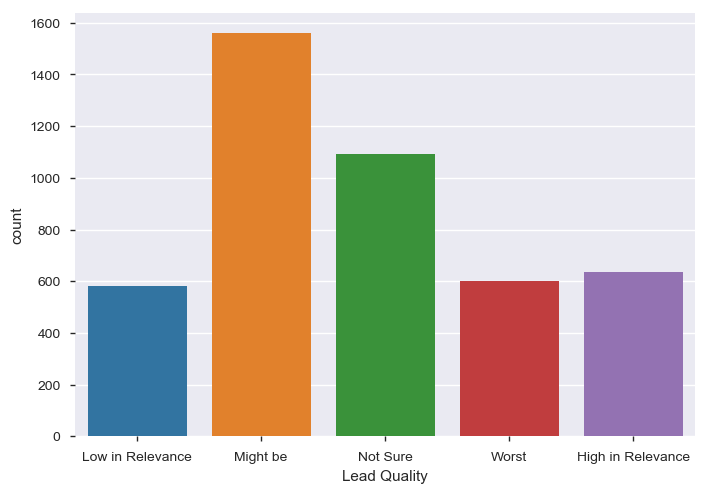

In [1307]:
sns.countplot(lead_df['Lead Quality'])

Here we can see that "Might be" Lead Quality on top.

In [1308]:
# imputing NaN to 'Not Sure'.
lead_df['Lead Quality'] = lead_df['Lead Quality'].replace(np.nan, 'Not Sure')

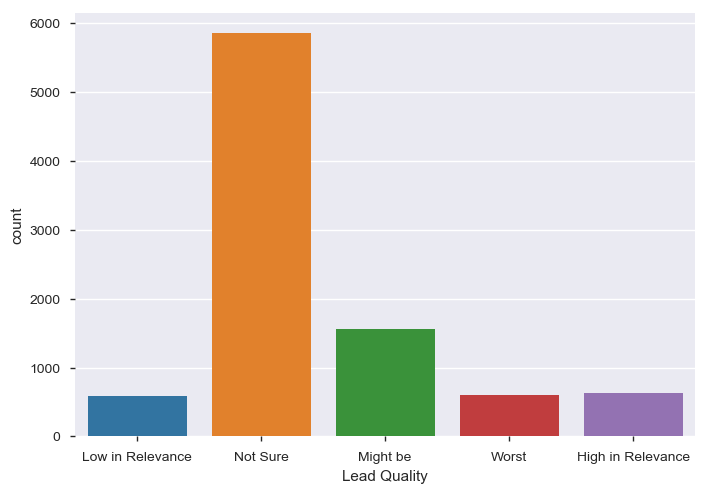

In [1309]:
sns.countplot(lead_df['Lead Quality'])


###### Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score : Columns

In [1310]:
# Asymmetrique Activity Index, Asymmetrique Profile Index, Asymmetrique Activity Score, Asymmetrique Profile Score 
# are related to each customer

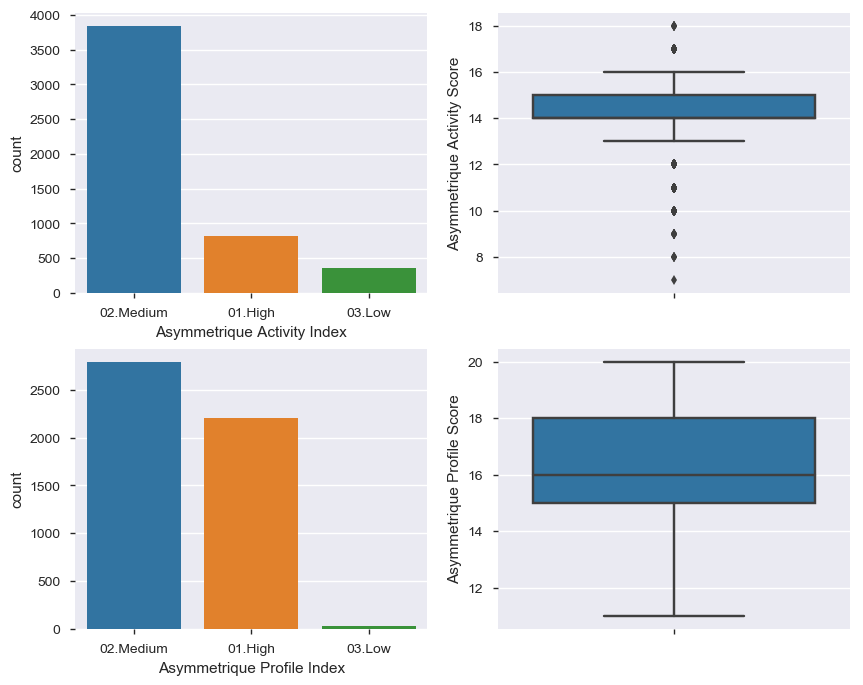

In [1311]:
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 1)

plt1 = sns.countplot(lead_df['Asymmetrique Activity Index'])
plt.subplot(2, 2, 2)
plt2 = sns.boxplot(lead_df['Asymmetrique Activity Score'],orient="v")
plt.subplot(2, 2, 3)
plt3 = sns.countplot(lead_df['Asymmetrique Profile Index'])
plt.subplot(2, 2, 4)
plt4 = sns.boxplot(lead_df['Asymmetrique Profile Score'],orient="v")
plt.show()

Here we can see that there are too many ups and down in data and also more than 45% data is missing so we can drop this. 

In [1312]:
lead_df = lead_df.drop(['Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Profile Score'],1)

###### City : Column

In [1313]:
lead_df.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

Here 'Mumbai' on top

In [1314]:
lead_df.City.head()

0       NaN
1       NaN
2    Mumbai
3    Mumbai
4    Mumbai
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

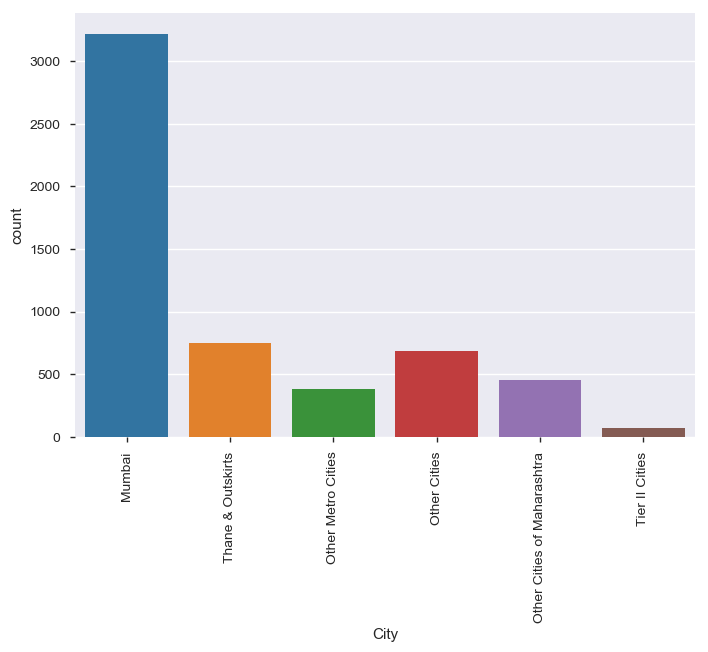

In [1315]:
sns.countplot(lead_df.City)
plt.xticks(rotation = 90)

In [1316]:
# Mode of city in 'Mumbai' so imputing NaN to 'Mumbai'
lead_df.City = lead_df.City.replace(np.nan, 'Mumbai')

###### Specailization : Column

In [1317]:
lead_df.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

Top used value is 'Finance Management'

In [1318]:
#  The lead don't have any specialization ie NaN (36%) value, So we can create new specialization that is 'Others_Specialization'
# So imputing NaN to 'Others_Specialization'
lead_df.Specialization = lead_df.Specialization.replace(np.nan, 'Others_Specialization')


###### Tag : Column

In [1319]:
lead_df.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

'Will revert after reading the email' top used value.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

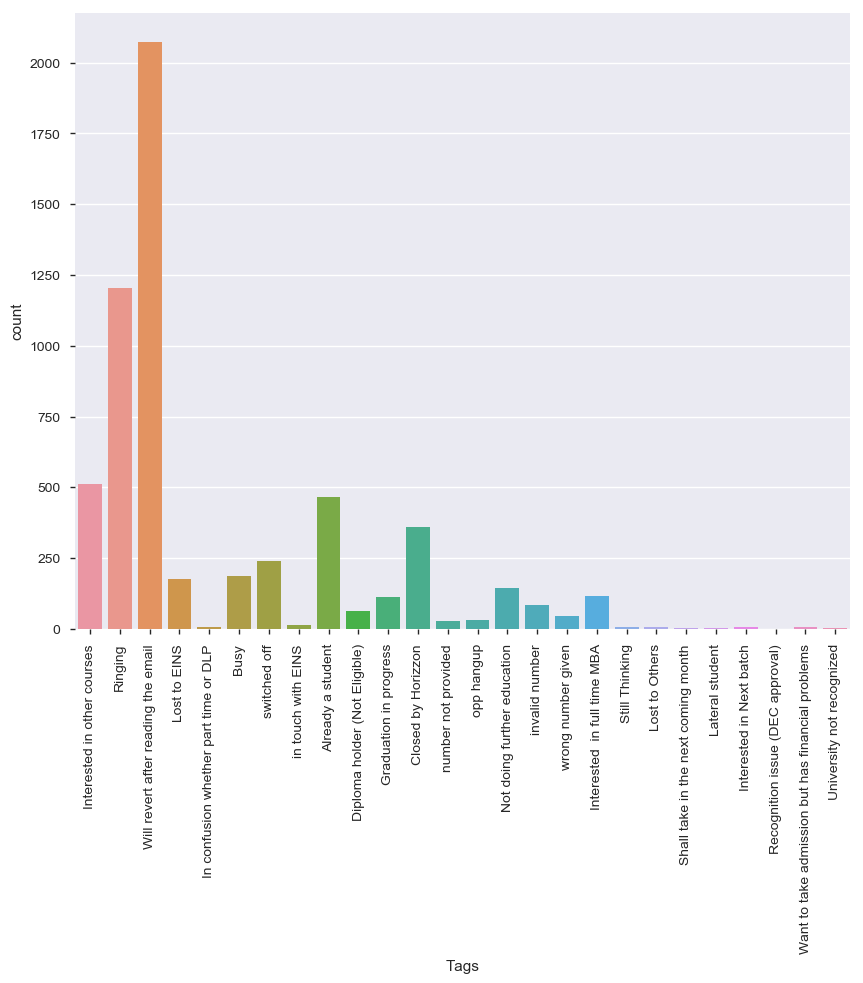

In [1320]:
plt.figure(figsize=(10,8))
sns.countplot(lead_df.Tags)
plt.xticks(rotation = 90)

In [1321]:
# Replacing NaN to 'Will revert after reading the email'
lead_df.Tags = lead_df.Tags.replace(np.nan, 'Will revert after reading the email')

###### What matters most to you in choosing a course: Column

In [1322]:
lead_df['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

'Better Career Prospects' is top used value.

In [1323]:
# Imputing NaN to 'Better Career Prospects', because mode is 'Better Career Prospects'.
lead_df['What matters most to you in choosing a course'] = lead_df['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

###### 'What is your current occupation' : Column

In [1324]:
lead_df['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

'Unemployed' is the top used value.

In [1325]:
# Imputing NaN to 'Unemployed'.
lead_df['What is your current occupation'] = lead_df['What is your current occupation'].replace(np.nan, 'Unemployed')

###### Country : Column

In [1326]:
lead_df.Country.describe()

count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

Here 'India' is the most used value.

In [1327]:
# Imputing NaN to 'India'
lead_df.Country = lead_df.Country.replace(np.nan, 'India')

In [1328]:
# Checking missing values %.
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                     0.00
Lead Number                                     0.00
Lead Origin                                     0.00
Lead Source                                     0.39
Do Not Email                                    0.00
Do Not Call                                     0.00
Converted                                       0.00
TotalVisits                                     1.48
Total Time Spent on Website                     0.00
Page Views Per Visit                            1.48
Last Activity                                   1.11
Country                                         0.00
Specialization                                  0.00
What is your current occupation                 0.00
What matters most to you in choosing a course   0.00
Search                                          0.00
Magazine                                        0.00
Newspaper Article                               0.00
X Education Forums                            

Now here we can see that columns having missing values is less that 2%. Se can drop it.

In [1329]:
# Drop missing values
lead_df.dropna(inplace = True)

In [1330]:
# Checking missing values %.
round(100*(lead_df.isnull().sum()/len(lead_df.index)), 2)

Prospect ID                                     0.00
Lead Number                                     0.00
Lead Origin                                     0.00
Lead Source                                     0.00
Do Not Email                                    0.00
Do Not Call                                     0.00
Converted                                       0.00
TotalVisits                                     0.00
Total Time Spent on Website                     0.00
Page Views Per Visit                            0.00
Last Activity                                   0.00
Country                                         0.00
Specialization                                  0.00
What is your current occupation                 0.00
What matters most to you in choosing a course   0.00
Search                                          0.00
Magazine                                        0.00
Newspaper Article                               0.00
X Education Forums                            

## EDA (Exploratory Data Analytics)

In [1331]:
# Print head of data set.
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,No,Interested in other courses,Low in Relevance,No,No,Mumbai,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,No,Ringing,Not Sure,No,No,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,No,Will revert after reading the email,Might be,No,No,Mumbai,No,No,Modified


In [1332]:
lead_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1333]:
# Converter
# 'Converter' is the variable that indicates lead has been successfully converted(1) or not(0)
# So Checking the lead successfully converted %.
converted_Percentage = (sum(lead_df['Converted'])/len(lead_df['Converted'].index))*100
converted_Percentage

37.85541106458012

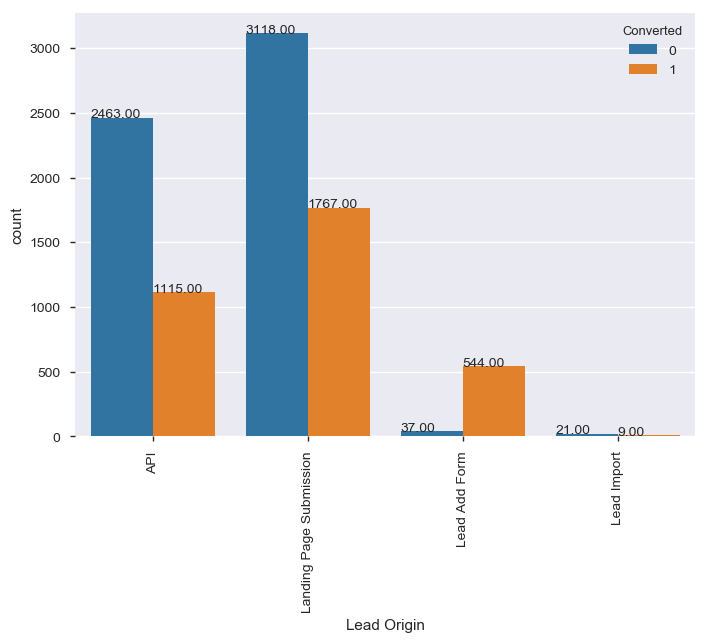

In [1334]:
# Lead Origin
ax = sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

Inference:

    - 'Landing Page Submission' is the top converstion count, than second is 'API' variable.
    - 'Lead Add From' aprox 90% conversion rate but count of lead are not very high.
    - 'Lead Import' having only 9 count of conversion rate.
    
- So according to the above visualization and Inferences we say that, we need to target 'Landing Page Submission' and 'API' variables to improve the overall lead converstion rate.

In [1335]:
# Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text xticklabel objects>)

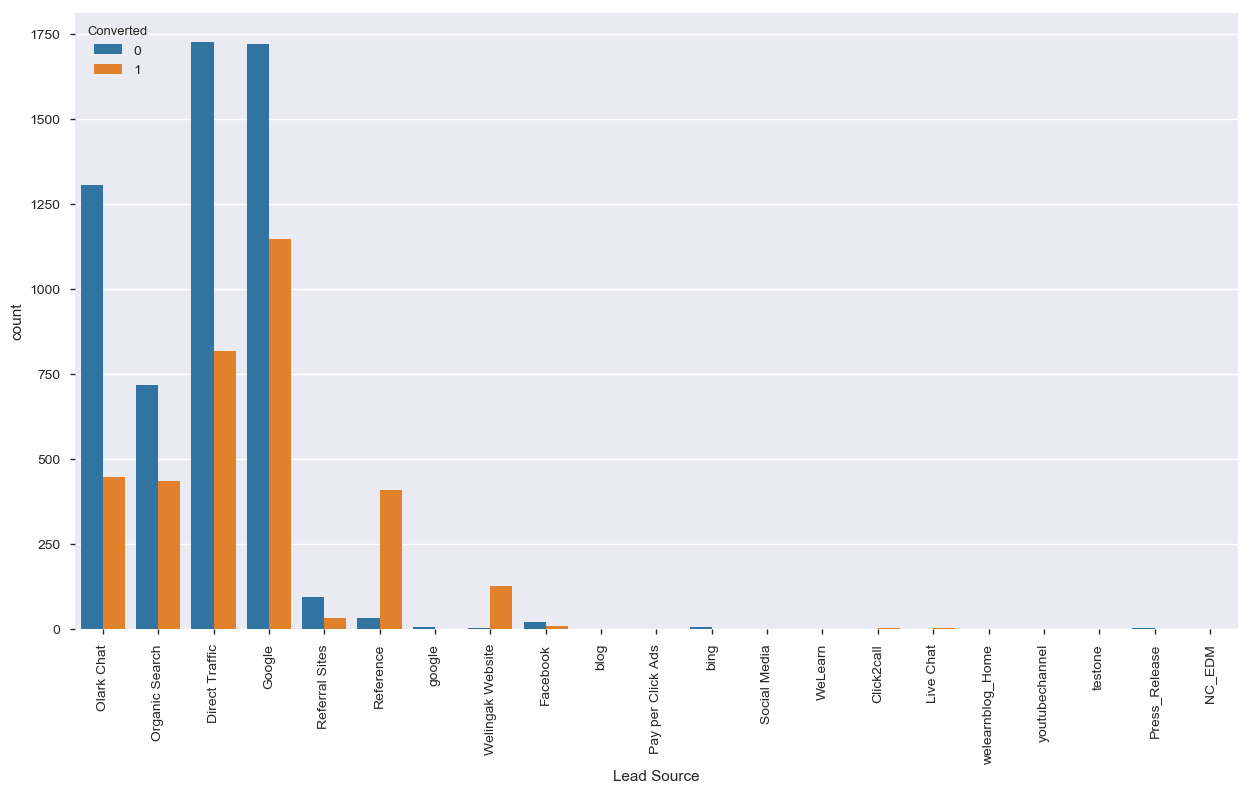

In [1336]:
plt.figure(figsize=(15,8))
ax = sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

- Above we can see 'Google' and 'google' are having two column, so we can replace 'google' to 'Google'.
- There are nubmber of columns having very less values, all most equale to 0, so we can combine all together.

In [1337]:
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['google'], 'Google')
lead_df['Lead Source'] = lead_df['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

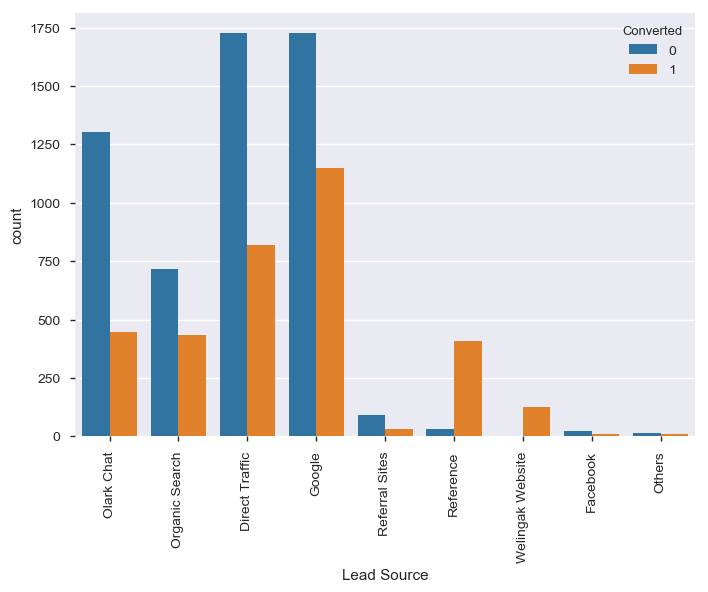

In [1338]:
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

Inference:

    - In Lead Source 'Google' having top most converstion count of leads.
    - Second highest converstion count of 'Direct Traffic' Lead Source.
    
- So according to the above visualization and Inferences we say that, we need to target Google, Direct, Organic Search, and Olark Chat variables to improve the overall lead converstion rate and generate more leads from reference and welingak website.

In [1339]:
# Do Not Email & Do Not Call

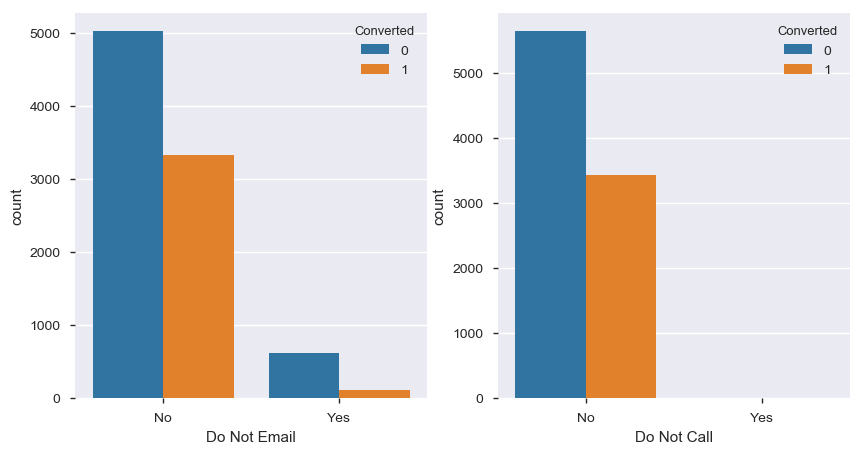

In [1340]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_df)
plt.subplot(1, 2, 2)
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_df)

Inference:

    - In 'Do Not Email' if lead sending email than converstion count is high.
    - In 'Do Not Call' if lead called than converstion count is high.

In [1341]:
# Total Visits

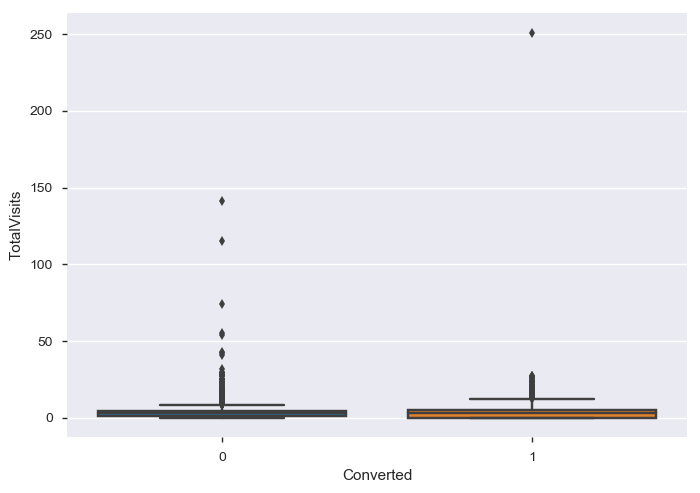

In [1342]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)

Here we can see that 'TotalVisits' column having outlier.

In [1343]:
lead_df['TotalVisits'].describe(percentiles=[0.05,.25, .50, .75, .90, .95, .99])

count   9074.00
mean       3.46
std        4.86
min        0.00
5%         0.00
25%        1.00
50%        3.00
75%        5.00
90%        7.00
95%       10.00
99%       17.00
max      251.00
Name: TotalVisits, dtype: float64

In [1344]:
# 17.00 data is 99% 
# So for analysis 5% to 95 % 
percentiles = lead_df['TotalVisits'].quantile([0.05,0.95]).values
lead_df['TotalVisits'][lead_df['TotalVisits'] <= percentiles[0]] = percentiles[0]
lead_df['TotalVisits'][lead_df['TotalVisits'] >= percentiles[1]] = percentiles[1]

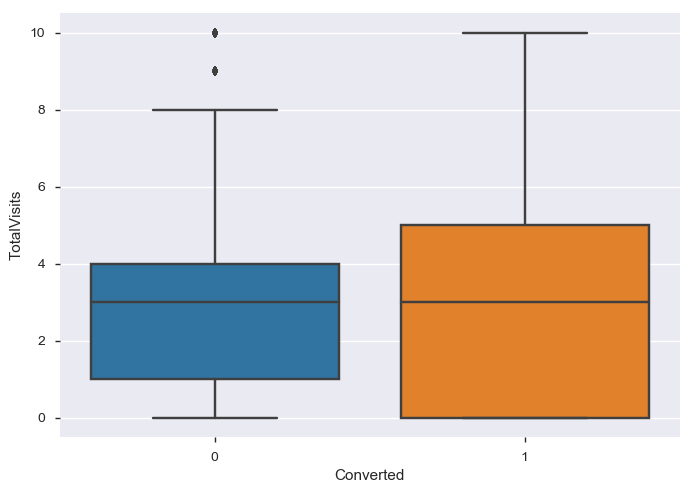

In [1345]:
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = lead_df)

Inference:

    - Median of both converted and not converted are equal.


In [1346]:
# Total time spent on website

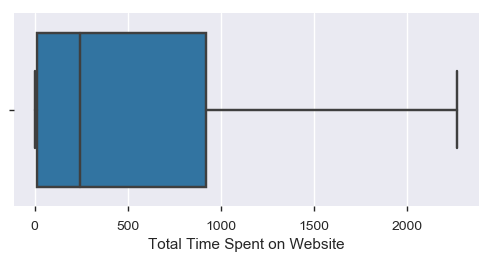

In [1347]:
plt.figure(figsize=(6,2.5))
sns.boxplot(lead_df['Total Time Spent on Website'])

In [1348]:
lead_df['Total Time Spent on Website'].describe()

count   9074.00
mean     482.89
std      545.26
min        0.00
25%       11.00
50%      246.00
75%      922.75
max     2272.00
Name: Total Time Spent on Website, dtype: float64

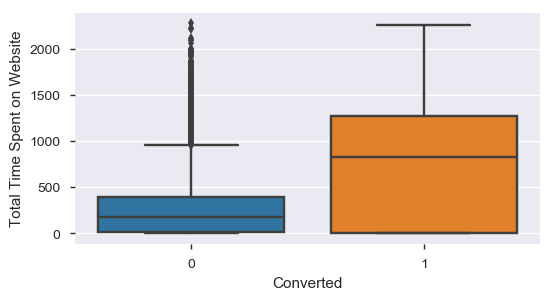

In [1349]:
plt.figure(figsize=(6,3))
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_df)

Inference:
    
    - If the lead spenting more time to the website those are hight chance of converstion.

- So we can work on website there lead can spent more time.

In [1350]:
# Page Views Per Visit

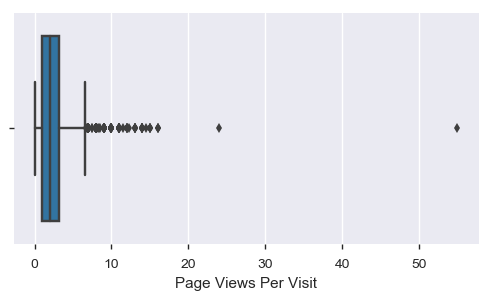

In [1351]:
plt.figure(figsize=(6,3))
sns.boxplot(lead_df['Page Views Per Visit'])

In [1352]:
#  Above we can see that there are outliers. So for analysis we have to do outlier treatment.
percentiles = lead_df['Page Views Per Visit'].quantile([0.05,0.95]).values
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] <= percentiles[0]] = percentiles[0]
lead_df['Page Views Per Visit'][lead_df['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

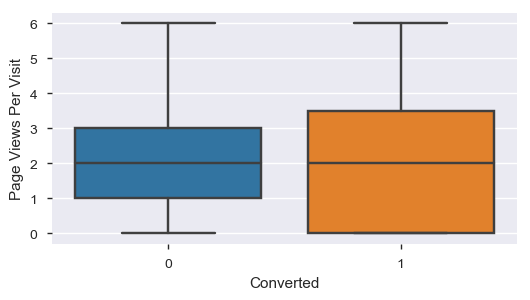

In [1353]:
plt.figure(figsize=(6,3))
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = lead_df)

Inferences:

    - Meadian of Converted and not converted are same.

In [1354]:
# Last Activity

In [1355]:
lead_df['Last Activity'].describe()

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

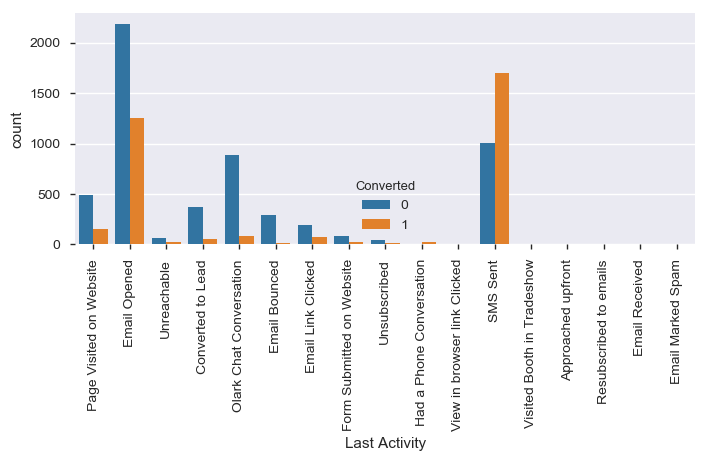

In [1356]:
plt.figure(figsize=(8,3))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

In [1357]:
# Above we can see that in 'Last Activity' number of values near to 0, so combine all others to "Other_Activity"
lead_df['Last Activity'] = lead_df['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other_Activity')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

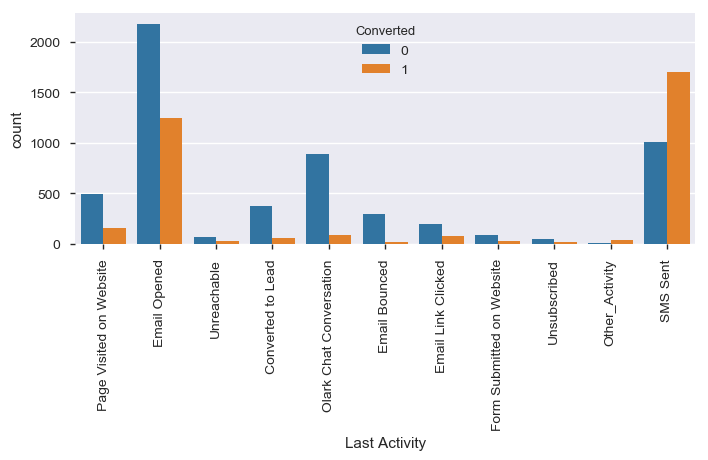

In [1358]:
plt.figure(figsize=(8,3))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

Inferences:

    - SMS Sent is the high converstion count.
    - Email Opened having second converstion count.
    
- So we can focus on 'SMS sent' &'Email Opened' to impove the converstion rate.

In [1359]:
# Country

In [1360]:
lead_df['Country'].describe()

count      9074
unique       38
top       India
freq       8787
Name: Country, dtype: object

Here we can see that 'India' in mostly used value(8787 in 9074), so here we can not get any inference.

In [1361]:
# Specialization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text xticklabel objects>)

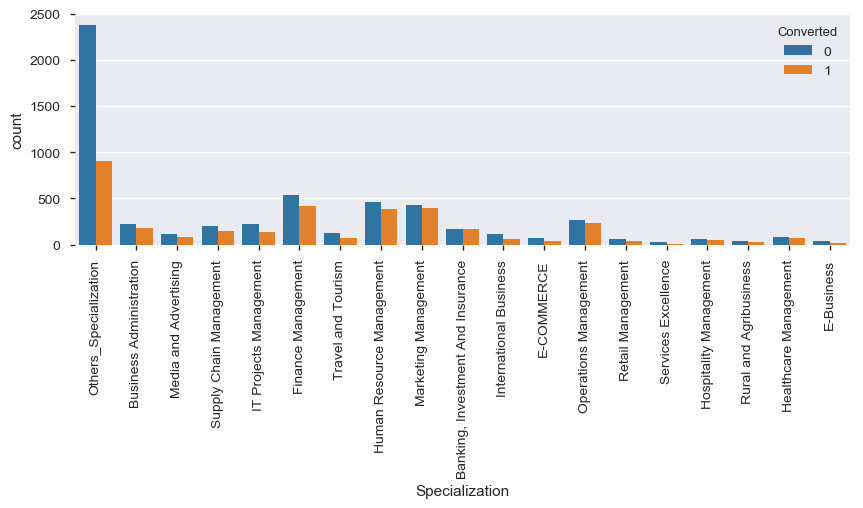

In [1362]:
plt.figure(figsize=(10,3))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

- Here 'Others_Specialization' hight converstion count that is the combination of numbers of Specialization.
- So above we can see that, we need to focus on high converstion rate.

In [1363]:
# What is your current occupation

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

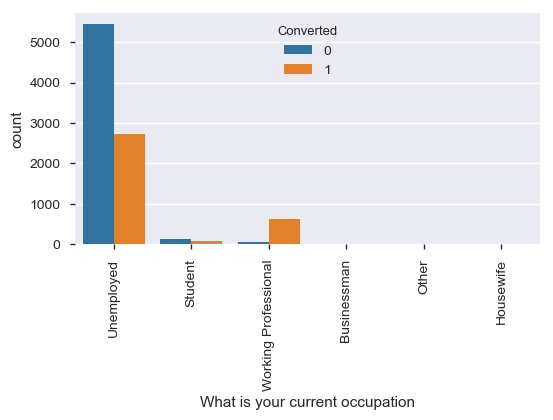

In [1364]:
plt.figure(figsize=(6,3))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

Inferences:

    - Unemployed is the high count of Converted.
    - Very hight change of converted rate of Working Professional.

In [1365]:
# What matters most to you in choosing a course

In [1366]:
lead_df['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

-  Better Career Prospects is the mostaly used value

In [1367]:
# Search

In [1368]:
lead_df['Search'].describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

- Here 'No' is top used value almost 98%.

In [1369]:
# Magazine

In [1370]:
lead_df['Magazine'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

- Here 'No' is 100% used value.

In [1371]:
# Newspaper Article

In [1372]:
lead_df['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

 - Here 'No' is aprox 99% used value.

In [1373]:
# X Education Forums

In [1374]:
lead_df['X Education Forums'].describe()

count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

 - Here 'No' is 99.9% used value.

In [1375]:
# Newspaper

In [1376]:
lead_df['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

 - Here 'No' is 99.9% used value.

In [1377]:
# Digital Advertisement

In [1378]:
lead_df['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

- Here we can see that 'No' all most used value (9070 of 9074). 

In [1379]:
# Through Recommendations

In [1380]:
lead_df['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

- Here we can see that 'No' all most used value (9067 outof 9074). 

In [1381]:
# Receive More Updates About Our Courses

In [1382]:
lead_df['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

- Here we can see that 'No' is 100% used value.

In [1383]:
# Tags

In [1384]:
lead_df['Tags'].describe()

count                                    9074
unique                                     26
top       Will revert after reading the email
freq                                     5343
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text xticklabel objects>)

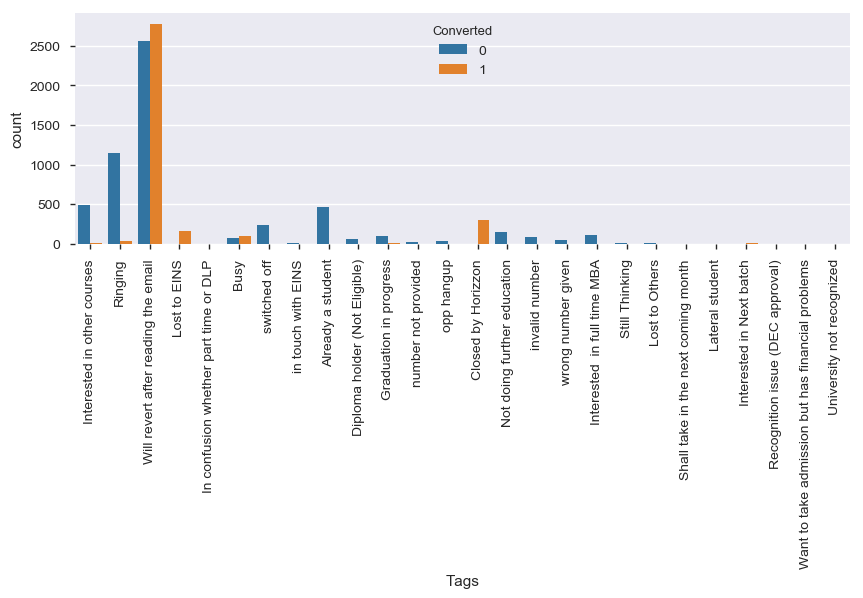

In [1385]:
plt.figure(figsize=(10,3))
sns.countplot(x = "Tags", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

In [1386]:
#  Above se can see that numbers of value having near to 0 count so combining them all together.
lead_df['Tags'] = lead_df['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Other_Tags')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

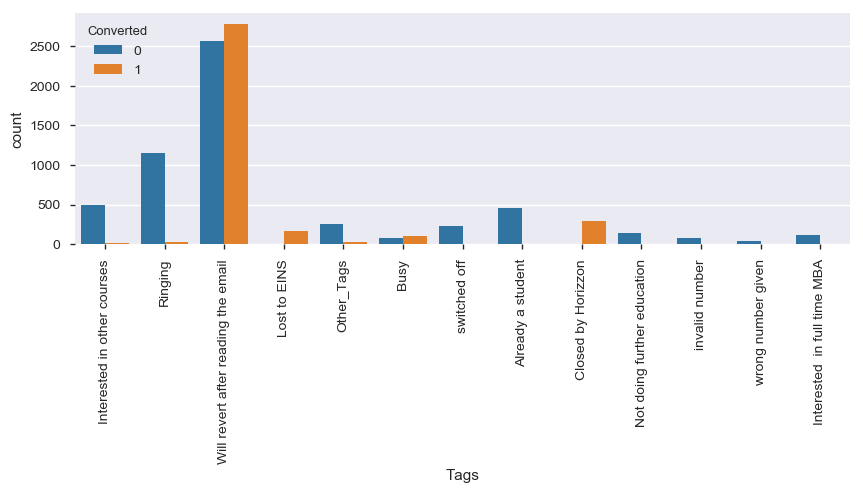

In [1387]:
plt.figure(figsize=(10,3))
sns.countplot(x = "Tags", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

Inferences:

    - Will revert after reading the email having very high converstion rate.
    - Closed by Horizzon & Lost to EINS is good converstion rate.

In [1388]:
# Lead Quality

In [1389]:
lead_df['Lead Quality'].describe()

count         9074
unique           5
top       Not Sure
freq          5806
Name: Lead Quality, dtype: object

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

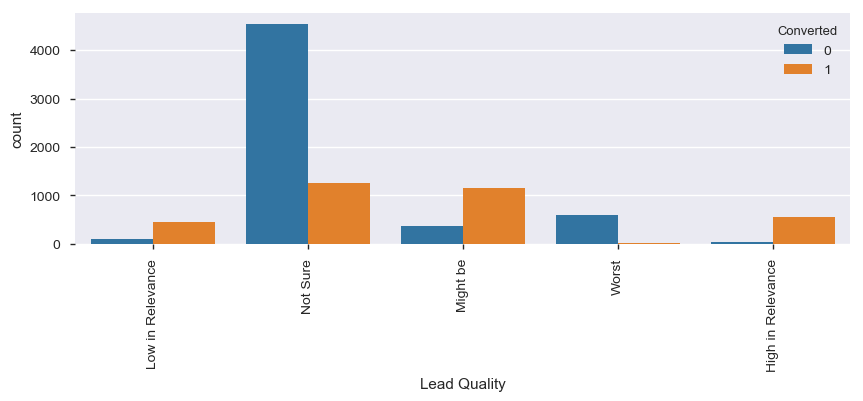

In [1390]:
plt.figure(figsize=(10,3))
sns.countplot(x = "Lead Quality", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

- Might be, hight in Relevance, Low in Relevance are having rate of converstion.

In [1391]:
# Update me on Supply Chain Content

In [1392]:
lead_df['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

- Here 'No' is 100% used value.

In [1393]:
# Get updates on DM Content

In [1394]:
lead_df['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

- Here 'No' is 100% used value.

In [1395]:
# City

In [1396]:
lead_df.City.describe()

count       9074
unique         6
top       Mumbai
freq        6752
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

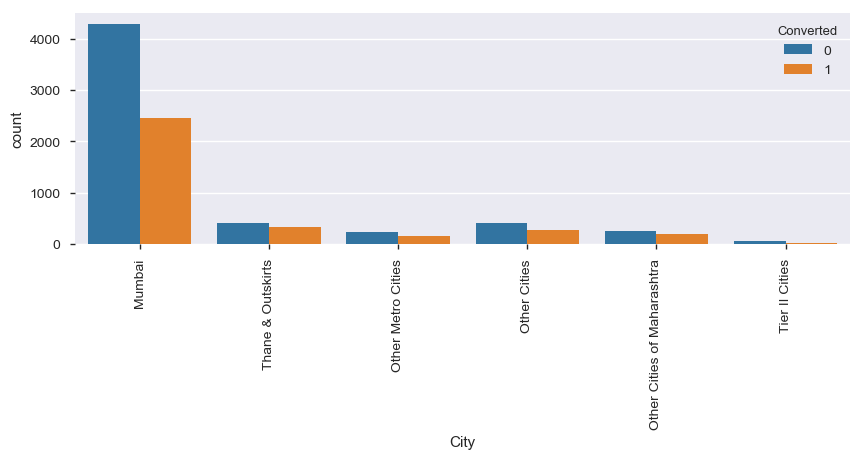

In [1397]:
plt.figure(figsize=(10,3))
sns.countplot(x = "City", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

Inferences:

    - Here we can see that most of the lead from 'Mumbai'

In [1398]:
# I agree to pay the amount through cheque¶

In [1399]:
lead_df['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

- Here 'No' is 100% used value.

In [1400]:
# A free copy of Mastering The Interview

In [1401]:
lead_df['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

- Here we can see that most of the value is used is 'No'.

In [1402]:
# Last Notable Activity

In [1403]:
lead_df['Last Notable Activity'].describe()

count         9074
unique          16
top       Modified
freq          3267
Name: Last Notable Activity, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

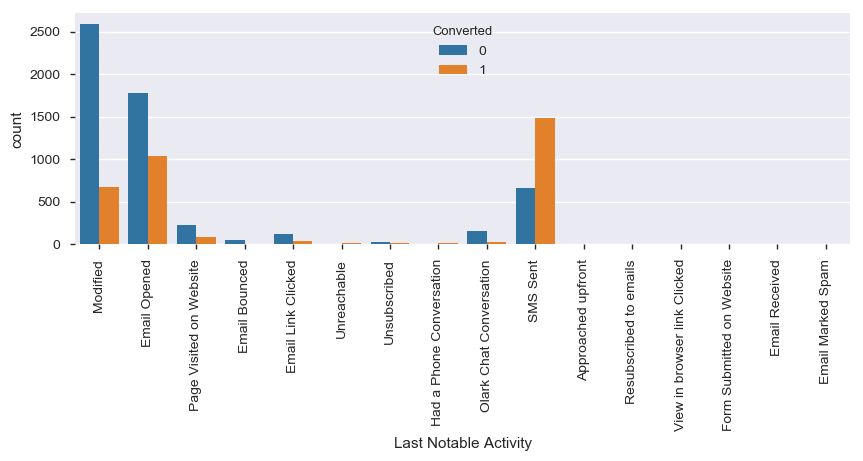

In [1404]:
plt.figure(figsize=(10,3))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_df)
plt.xticks(rotation = 90)

- SMS Sent is high converted count.

#### After performing EDA we seen and came to the result many of the columns are not adding any infromation to the model. So we can drop those columns for further analysis.

In [1405]:
lead_df = lead_df.drop(['Lead Number','Country', 'What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
           'Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview'],1)

In [1406]:
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.00,0,0.00,Page Visited on Website,Others_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.00,674,2.50,Email Opened,Others_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,Converted to Lead,Others_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified


In [1407]:
lead_df.shape

(9074, 16)

## Data Preparation

In [1408]:
# Mapping Yes to 1 and No to 0

varArr =  ['Do Not Email', 'Do Not Call']

def binary_Yes_No_map(x):
    return x.map({'Yes': 1, "No": 0})

lead_df[varArr] = lead_df[varArr].apply(binary_Yes_No_map)

In [1409]:
# Now create dummy variable 
dummy1 = pd.get_dummies(lead_df[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
# Concat the dummy variable to the main data frame 
lead_df = pd.concat([lead_df, dummy1], axis=1)
lead_df.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0,0.00,0,0.00,Page Visited on Website,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,0,5.00,674,2.50,Email Opened,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,1,2.00,1532,2.00,Email Opened,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,0,1.00,305,1.00,Unreachable,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,1,2.00,1428,1.00,Converted to Lead,...,0,0,1,0,0,0,0,0,0,0


In [1410]:
lead_df = lead_df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [1411]:
lead_df.head()

,Prospect ID,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0,0.00,0,0.00,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,0,5.00,674,2.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,1,2.00,1532,2.00,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,0,1.00,305,1.00,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,1,2.00,1428,1.00,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1412]:
# Importing train_test_split model
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = lead_df.drop(['Prospect ID','Converted'], axis=1)

# Putting response variable to y
y = lead_df['Converted']

In [1413]:
# Creating train and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [1414]:
#  Printing head of X_train
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,2.00,397,2.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,2.00,190,2.00,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,0.00,0,0.00,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,2.00,1380,2.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,5.00,1584,2.50,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1415]:
#  Printing head of y_train
y_train.head()

3009    0
1012    0
9226    0
4750    1
7987    1
Name: Converted, dtype: int64

#### Scaling

In [1416]:
# Importing StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.43,-0.16,-0.16,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.43,-0.54,-0.16,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.15,-0.89,-1.27,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.43,1.64,-0.16,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.64,2.02,0.12,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Model Building

In [1417]:
# Importing statsmodels model
import statsmodels.api as sm

# Logistic regression model
lm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
lm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6265
Model Family:                Binomial   Df Model:                           85
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1250.0
Date:                Mon, 26 Aug 2019   Deviance:                       2500.0
Time:                        20:36:56   Pearson chi2:                 3.87e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.1437   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Do Not Email                                            -1.3882      0.327     -4.243      0.000      -2.030      -0.747
Do Not Call                                             23.7150   1.37e+05      0.000      1.000   -2.68e+05    2.68e+05
TotalVisits                                              0.1816      0.087      2.093      0.036       0.012       0.352
Total Time Spent on Website                              1.1457      0.064     17.913      0.000       1.020       1.271
Page Views Per Visit                                    -0.3272      0.099     -3.309      0.001      -0.521      -0.133
Lead Origin_Landing Page Submission                     -0.9762      0.221     -4.420      0.000      -1.409      -0.543
Lead Origin_Lead Add Form                               -0.4165      1.287     -0.324      0.746      -2.940       2.107
Lead Origin_Lead Import                                 29.7289   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -28.6304   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2017      0.155      1.302      0.193      -0.102       0.505
Lead Source_Olark Chat                                   0.8633      0.234      3.693      0.000       0.405       1.321
Lead Source_Organic Search                               0.2278      0.210      1.083      0.279      -0.185       0.640
Lead Source_Others                                       0.7602      0.816      0.931      0.352      -0.839       2.360
Lead Source_Reference                                    1.7732      1.344      1.319      0.187      -0.861       4.407
Lead Source_Referral Sites                              -0.0945      0.491     -0.193      0.847      -1.056       0.867
Lead Source_Welingak Website                             5.4722      1.486      3.682      0.000       2.559       8.385
Last Activity_Email Bounced                             -0.5488      0.870     -0.631      0.528      -2.254       1.157
Last Activity_Email Link Clicked                         0.8429      0.644      1.309      0.190      -0.419       2.105
Last Activity_Email Opened                              -0.0003      0.384     -0.001      0.999      -0.754       0.753
Last Activity_Form Submitted on Website                  0.1337      0.593      0.225      0.822      -1.028       1.296
Last Activity_Olark Chat Conversation                   -0.5464      0.392     -1.395      0.163      -1.314       0.221
Last Activity_Other_Activity                             1.4578      1.200      1.214      0.225      -0.895       3.811
Last Activity_Pa

In [1418]:
#  Using RFE for variables selection

# Importing LogisticRegression
from sklearn.linear_model import LogisticRegression

# Creating Object
logreg = LogisticRegression()

# Importing RFE
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)
rfe = rfe.fit(X_train, y_train)

In [1419]:
rfe.support_

array([ True, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True,  True,  True, False, False,  True,
       False, False,  True,  True,  True,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False])

In [1420]:
#  Checking Ranking
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 33),
 ('TotalVisits', False, 43),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 40),
 ('Lead Origin_Landing Page Submission', False, 16),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Facebook', False, 49),
 ('Lead Source_Google', False, 38),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 39),
 ('Lead Source_Others', False, 46),
 ('Lead Source_Reference', False, 70),
 ('Lead Source_Referral Sites', False, 53),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 28),
 ('Last Activity_Email Link Clicked', False, 36),
 ('Last Activity_Email Opened', False, 60),
 ('Last Activity_Form Submitted on Website', False, 66),
 ('Last Activity_Olark Chat Conversation', False, 13),
 ('Last Activity_Other_Activity', False, 8),
 ('Last Activity_Page Visited on Website', False, 37),
 ('Last Activity_SMS Sent',

In [1421]:
# Check Feature used of model building
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [1494]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Import', 'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Others', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Other_Activity',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       '

In [1422]:
X_train_sm = sm.add_constant(X_train[col])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1580.6
Date:                Mon, 26 Aug 2019   Deviance:                       3161.3
Time:                        20:36:58   Pearson chi2:                 3.11e+04
No. Iterations:                    24   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8547      0.215     -8.636      0.000      -2.276      -1.434
Do Not Email                                            -1.3106      0.213     -6.154      0.000      -1.728      -0.893
Lead Origin_Lead Add Form                                1.0452      0.360      2.900      0.004       0.339       1.752
Lead Source_Welingak Website                             3.4638      0.817      4.238      0.000       1.862       5.066
What is your current occupation_Working Professional     1.2843      0.287      4.476      0.000       0.722       1.847
Tags_Busy                                                3.5477      0.332     10.680      0.000       2.897       4.199
Tags_Closed by Horizzon                                  7.7377      0.762     10.152      0.000       6.244       9.231
Tags_Lost to EINS                                        8.9540      0.753     11.887      0.000       7.478      10.430
Tags_Ringing                                            -1.9696      0.340     -5.800      0.000      -2.635      -1.304
Tags_Will revert after reading the email                 3.7332      0.228     16.340      0.000       3.285       4.181
Tags_invalid number                                    -23.4649   2.21e+04     -0.001      0.999   -4.34e+04    4.33e+04
Tags_switched off                                       -2.5711      0.589     -4.367      0.000      -3.725      -1.417
Tags_wrong number given                                -23.0779   3.17e+04     -0.001      0.999   -6.21e+04     6.2e+04
Lead Quality_Not Sure                                   -3.3496      0.129    -26.033      0.000      -3.602      -3.097
Lead Quality_Worst                                      -3.7672      0.848     -4.445      0.000      -5.428      -2.106
Last Notable Activity_SMS Sent                           2.7931      0.122     22.838      0.000       2.553       3.033
========================================================================================================================
"""

In [1423]:
# Deleting 'Tags_invalid number' because having p-value is 0.999
col1 = col.drop('Tags_invalid number',1)

In [1424]:
X_train_sm = sm.add_constant(X_train[col1])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1586.7
Date:                Mon, 26 Aug 2019   Deviance:                       3173.3
Time:                        20:36:58   Pearson chi2:                 3.07e+04
No. Iterations:                    22   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0195      0.217     -9.308      0.000      -2.445      -1.594
Do Not Email                                            -1.3018      0.212     -6.130      0.000      -1.718      -0.886
Lead Origin_Lead Add Form                                1.0769      0.362      2.974      0.003       0.367       1.787
Lead Source_Welingak Website                             3.4268      0.818      4.190      0.000       1.824       5.030
What is your current occupation_Working Professional     1.3240      0.290      4.567      0.000       0.756       1.892
Tags_Busy                                                3.7300      0.331     11.270      0.000       3.081       4.379
Tags_Closed by Horizzon                                  7.8904      0.763     10.345      0.000       6.396       9.385
Tags_Lost to EINS                                        9.1124      0.754     12.086      0.000       7.635      10.590
Tags_Ringing                                            -1.7713      0.338     -5.244      0.000      -2.433      -1.109
Tags_Will revert after reading the email                 3.8970      0.230     16.954      0.000       3.446       4.348
Tags_switched off                                       -2.3666      0.588     -4.028      0.000      -3.518      -1.215
Tags_wrong number given                                -20.8825   1.17e+04     -0.002      0.999   -2.29e+04    2.28e+04
Lead Quality_Not Sure                                   -3.3417      0.128    -26.020      0.000      -3.593      -3.090
Lead Quality_Worst                                      -3.7822      0.848     -4.462      0.000      -5.444      -2.121
Last Notable Activity_SMS Sent                           2.7503      0.120     22.841      0.000       2.514       2.986
========================================================================================================================
"""

In [1425]:
# Deleting 'Tags_wrong number given' because having p-value is 0.999

col2 = col1.drop('Tags_wrong number given',1)

In [1426]:
X_train_sm = sm.add_constant(X_train[col2])
lm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = lm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1588.8
Date:                Mon, 26 Aug 2019   Deviance:                       3177.6
Time:                        20:36:58   Pearson chi2:                 3.08e+04
No. Iterations:                     8   Covariance Type:             nonrobust
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0888      0.216     -9.654      0.000      -2.513      -1.665
Do Not Email                                            -1.3012      0.212     -6.134      0.000      -1.717      -0.885
Lead Origin_Lead Add Form                                1.0894      0.363      3.001      0.003       0.378       1.801
Lead Source_Welingak Website                             3.4138      0.818      4.173      0.000       1.810       5.017
What is your current occupation_Working Professional     1.3403      0.291      4.602      0.000       0.769       1.911
Tags_Busy                                                3.8040      0.330     11.532      0.000       3.157       4.450
Tags_Closed by Horizzon                                  7.9562      0.763     10.433      0.000       6.461       9.451
Tags_Lost to EINS                                        9.1785      0.754     12.177      0.000       7.701      10.656
Tags_Ringing                                            -1.6947      0.337     -5.036      0.000      -2.354      -1.035
Tags_Will revert after reading the email                 3.9665      0.229     17.311      0.000       3.517       4.416
Tags_switched off                                       -2.2882      0.587     -3.900      0.000      -3.438      -1.138
Lead Quality_Not Sure                                   -3.3406      0.128    -26.026      0.000      -3.592      -3.089
Lead Quality_Worst                                      -3.7624      0.850     -4.426      0.000      -5.428      -2.096
Last Notable Activity_SMS Sent                           2.7406      0.120     22.847      0.000       2.506       2.976
========================================================================================================================
"""

Above we can see that all p-value < 0.05.

In [1427]:
#  predict on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([1.88037158e-01, 1.94070077e-01, 8.04879357e-04, 7.82076694e-01,
       9.77003470e-01, 9.90227993e-01, 1.88037158e-01, 7.53103755e-01,
       8.67356930e-01, 8.04879357e-04])

In [1428]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.19,3009
1,0,0.19,1012
2,0,0.00,9226
3,1,0.78,4750
4,1,0.98,7987


In [1429]:
# Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Printing head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.19,3009,0
1,0,0.19,1012,0
2,0,0.00,9226,0
3,1,0.78,4750,1
4,1,0.98,7987,1


#### Confusion matrix

In [1430]:
# Importing metrics
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3756  149]
 [ 363 2083]]


In [1431]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.9193827743662415


#### Checking VIFs

In [1432]:
# Importing variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,Tags_Will revert after reading the email,2.89
12,Last Notable Activity_SMS Sent,2.85
1,Lead Origin_Lead Add Form,1.62
7,Tags_Ringing,1.56
2,Lead Source_Welingak Website,1.36
3,What is your current occupation_Working Profes...,1.26
5,Tags_Closed by Horizzon,1.15
0,Do Not Email,1.11
4,Tags_Busy,1.11
10,Lead Quality_Not Sure,1.11


Here we can see all VIF is acceptable.

#### Checking correlation

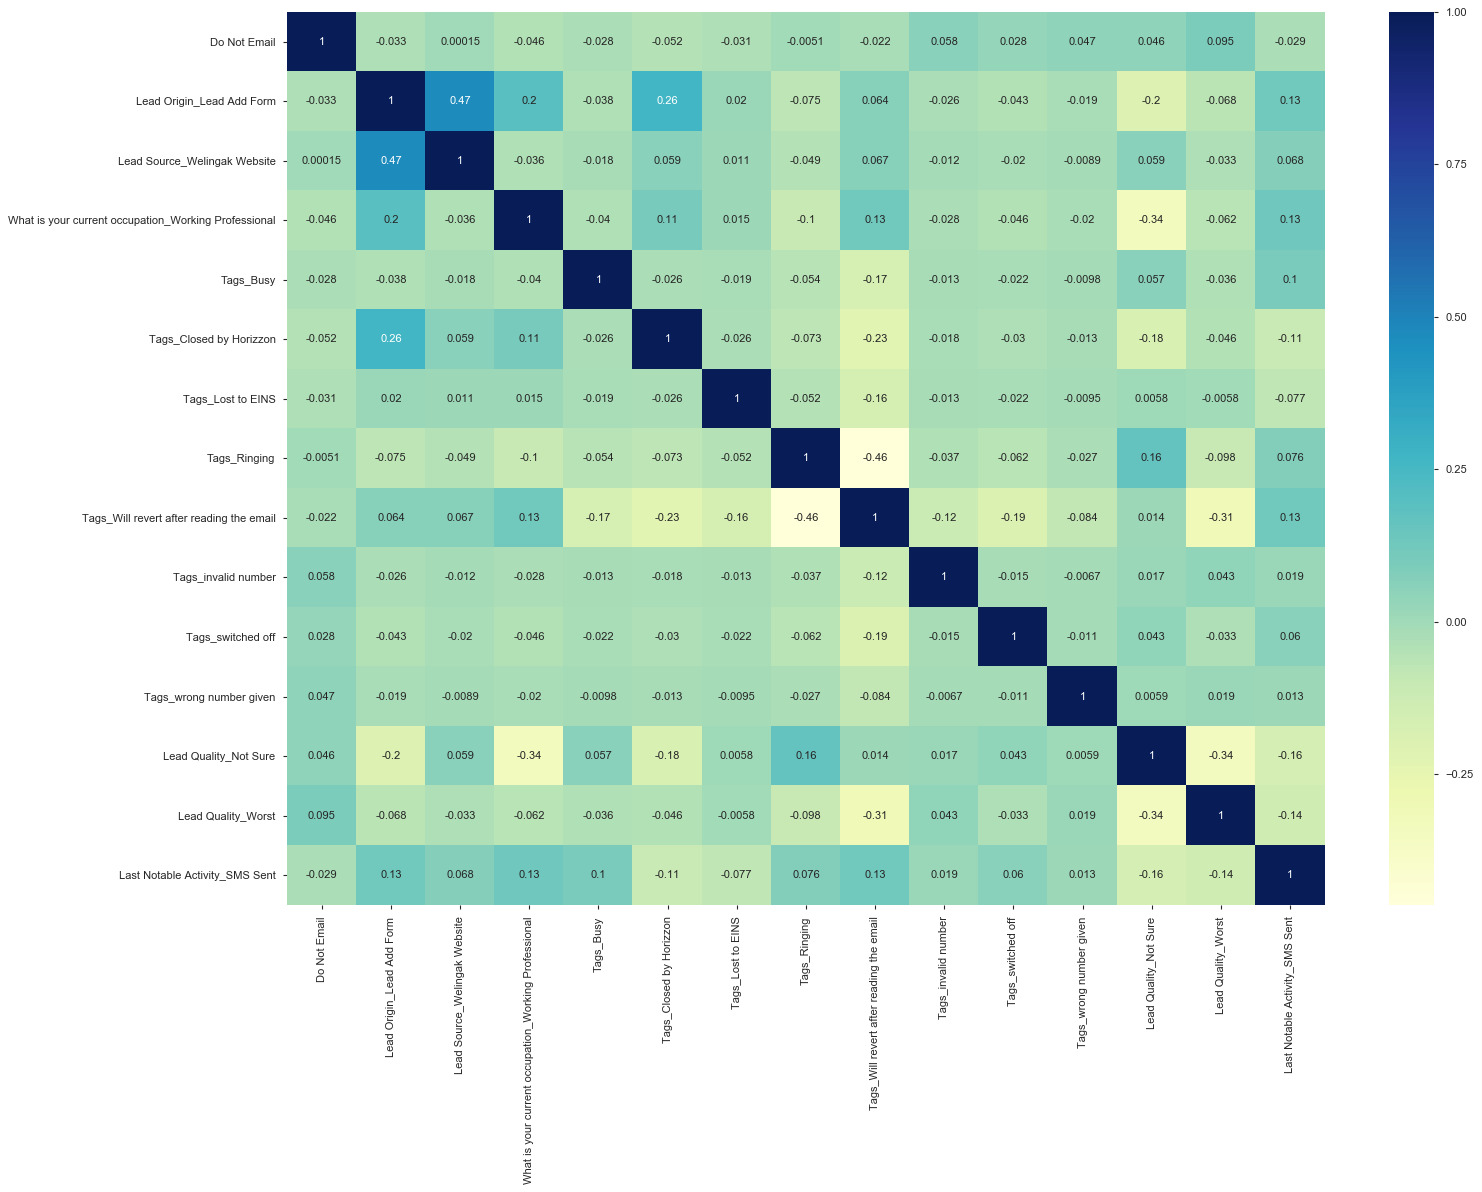

In [1433]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(20,15), dpi=80, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")

plt.tight_layout()
plt.show()

In [1434]:
# confusion Matrix

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1435]:
# Calculate Sensitivity
print(TP / float(TP+FN))

0.8515944399018807


In [1436]:
# Calculate specificity
print(TN / float(TN+FP))

0.9618437900128041


In [1437]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.038156209987195905


In [1438]:
# Calculate positive predictive value 
print(TP / float(TP+FP))

0.9332437275985663


In [1439]:
# Calculate Negative predictive value
print(TN / float(TN+ FN))

0.9118718135469774


#### Drow ROC Curve on train data set

In [1440]:
# Drow ROC Curve
def draw_roc_curve( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1441]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

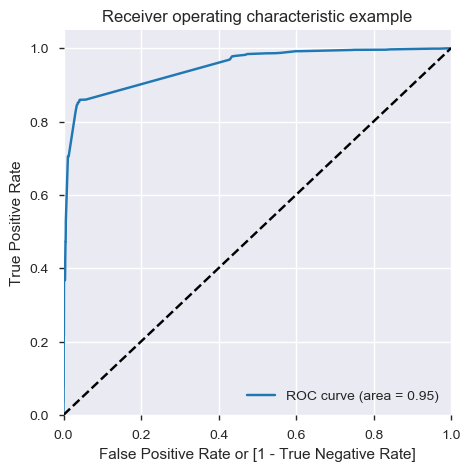

In [1442]:
draw_roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [1443]:
# Finding Optimal Cutoff Point
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.19,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.19,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.78,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.98,7987,1,1,1,1,1,1,1,1,1,1,1


In [1444]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy  sensi  speci
0.00  0.00      0.39   1.00   0.00
0.10  0.10      0.71   0.98   0.53
0.20  0.20      0.91   0.86   0.94
0.30  0.30      0.92   0.86   0.96
0.40  0.40      0.92   0.86   0.96
0.50  0.50      0.92   0.85   0.96
0.60  0.60      0.92   0.85   0.96
0.70  0.70      0.92   0.85   0.97
0.80  0.80      0.88   0.71   0.99
0.90  0.90      0.81   0.52   0.99


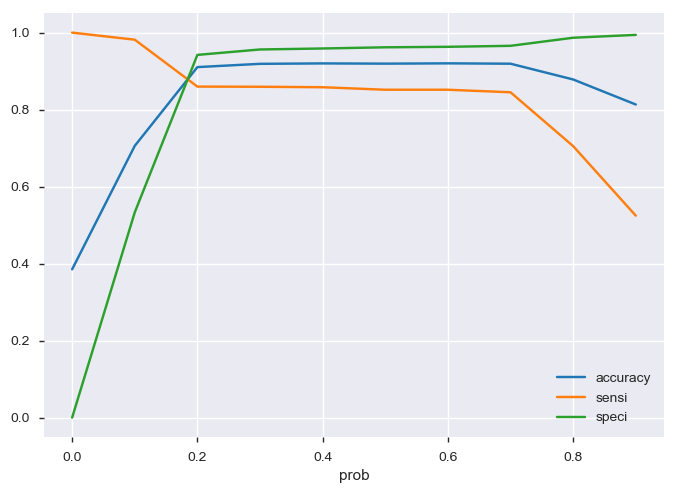

In [1445]:
# Plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [1446]:
# From the curve above, 0.2 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.2 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.19,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.19,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.78,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.98,7987,1,1,1,1,1,1,1,1,1,1,1,1


In [1447]:
# Assigning Lead Score
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.19,3009,0,1,1,0,0,0,0,0,0,0,0,0,19
1,0,0.19,1012,0,1,1,0,0,0,0,0,0,0,0,0,19
2,0,0.00,9226,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0.78,4750,1,1,1,1,1,1,1,1,1,0,0,1,78
4,1,0.98,7987,1,1,1,1,1,1,1,1,1,1,1,1,98


In [1448]:
# Angain check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1449]:
# Calculate sensitivity

print(TP / float(TP+FN))

0.8597710547833197


In [1450]:
# Calculate specificity
print(TN / float(TN+FP))

0.9421254801536492


In [1451]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.05787451984635083


In [1452]:
# Calculate Positive predictive value 
print(TP / float(TP+FP))

0.9029626449119794


In [1453]:
# Calculate Negative predictive value
print(TN / float(TN+ FN))

0.9147190452511188


#### Precision and Recall

In [1454]:
#Find Confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3756,  149],
       [ 363, 2083]])

In [1455]:
# Precision
precision = confusion[1,1]/(confusion[0,1]+confusion[1,1])
precision

0.9332437275985663

In [1456]:
# Recall
recall = confusion[1,1]/(confusion[1,0]+confusion[1,1])
recall

0.8515944399018807

In [1457]:
# Using sklearn

# Importing precision_score & recall_score model
from sklearn.metrics import precision_score, recall_score

In [1458]:
# precision_score
precision_score(y_train_pred_final.Converted , y_train_pred_final.Predicted)

0.9332437275985663

In [1459]:
# recall_score
recall_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8515944399018807

In [1460]:
# Precision and recall tradeoff

from sklearn.metrics import precision_recall_curve


In [1461]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [1462]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      0
 26      1
 27      1
 28      0
 29      1
        ..
 6321    0
 6322    1
 6323    0
 6324    1
 6325    0
 6326    0
 6327    0
 6328    1
 6329    1
 6330    1
 6331    0
 6332    0
 6333    0
 6334    0
 6335    0
 6336    0
 6337    0
 6338    0
 6339    0
 6340    0
 6341    0
 6342    1
 6343    0
 6344    1
 6345    1
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64, 0       0
 1       0
 2       0
 3       1
 4       1
 5       1
 6       0
 7       1
 8       1
 9       0
 10      0
 11      0
 12      0
 13      1
 14      1
 15      1
 16      0
 17      0
 18      0
 19      0
 20      1
 21      0
 22      0
 23      0
 24      1
 25      

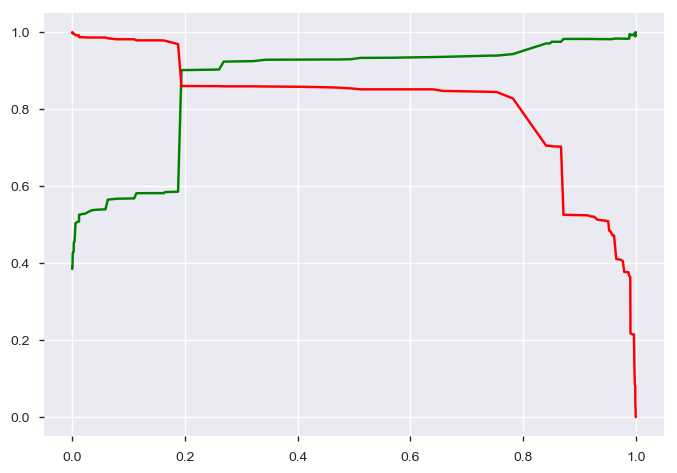

In [1463]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [1464]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8905515177426251

##  Predictions on the test data set

In [1465]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,0,0,-0.43,-0.16,-0.16,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1012,1,0,-0.43,-0.54,-0.16,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9226,0,0,-1.15,-0.89,-1.27,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4750,0,0,-0.43,1.64,-0.16,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7987,0,0,0.64,2.02,0.12,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [1466]:
X_test = X_test[col2]
X_test.head()

,Do Not Email,Lead Origin_Lead Add Form,Lead Source_Welingak Website,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,0,0,0,0,0,1,0,1,0,0
1490,0,0,0,1,0,0,0,0,1,0,0,0,0
7936,0,0,0,0,0,0,0,0,1,0,1,0,0
4216,0,1,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,0,0,0,0,0,1,0,1,0,0


In [1467]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm).values.reshape(-1)
y_test_pred[:10]

array([1.88037158e-01, 9.61507572e-01, 1.88037158e-01, 9.99048783e-01,
       1.88037158e-01, 9.61507572e-01, 1.23290863e-02, 4.44735850e-04,
       9.96691127e-01, 1.88037158e-01])

In [1468]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
0,0.19
1,0.96
2,0.19
3,1.00
4,0.19


In [1469]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.19
1,1,1490,0.96
2,0,7936,0.19
3,1,4216,1.00
4,0,3830,0.19


In [1470]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex_axis(['Prospect ID','Converted','Converted_Prob'], axis=1)

# Printing head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,3271,0,0.19
1,1490,1,0.96
2,7936,0,0.19
3,4216,1,1.00
4,3830,0,0.19


In [1471]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.2 else 0)
y_pred_final = y_pred_final.sort_values('Converted_Prob', ascending=False)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
573,373,1,1.00,1
452,3288,1,1.00,1
2294,3770,1,1.00,1
1788,3829,1,1.00,1
1059,8065,1,1.00,1


In [1472]:
# Check the overall accuracy.
acc_score = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
acc_score

0.906720528828498

In [1473]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1635,   99],
       [ 155,  834]])

In [1474]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

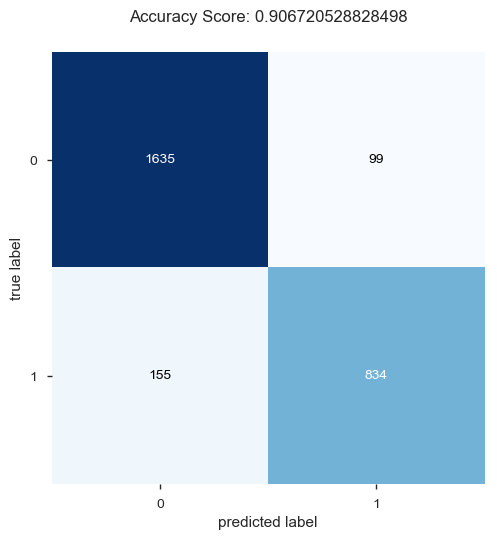

In [1475]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=confusion2)
all_sample_title = 'Accuracy Score: {0}'.format(acc_score)
plt.title(all_sample_title, size = 12);
# Automatically adjust subplot params so that the subplotS fits in to the figure area.
plt.tight_layout()

# display the plot
plt.show()

In [1476]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1477]:
# Calculate sensitivity
print(TP / float(TP+FN))

0.8432760364004045


In [1478]:
# Calculate specificity
print(TN / float(TN+FP))

0.9429065743944637


In [1479]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.05709342560553633


In [1480]:
# Positive predictive value 
print (TP / float(TP+FP))

0.8938906752411575


In [1481]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9134078212290503


In [1482]:
# Precision
Precision = confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])
Precision

0.8938906752411575

In [1483]:
# Recall
Recall = confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])
Recall

0.8432760364004045

In [1484]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.8678459937565037

#### Classification Report

In [1485]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Converted, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      1734
           1       0.89      0.84      0.87       989

   micro avg       0.91      0.91      0.91      2723
   macro avg       0.90      0.89      0.90      2723
weighted avg       0.91      0.91      0.91      2723



#### Plotting the ROC Curve for Test Dataset

In [1486]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr,tpr, thresholds

In [1487]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Converted_Prob, drop_intermediate = False )

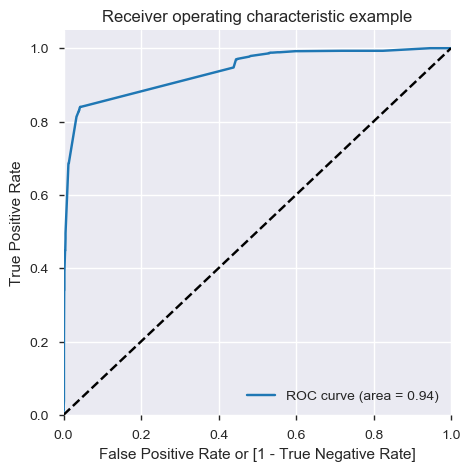

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 5.76701269e-04, 5.76701269e-04,
        1.15340254e-03, 1.15340254e-03, 1.15340254e-03, 1.15340254e-03,
        1.15340254e-03, 1.15340254e-03, 1.15340254e-03, 1.15340254e-03,
        1.15340254e-03, 1.15340254e-03, 1.15340254e-03, 1.15340254e-03,
        1.15340254e-03, 1.73010381e-03, 1.73010381e-03, 2.30680507e-03,
        2.30680507e-03, 2.30680507e-03, 2.30680507e-03, 2.30680507e-03,
        2.30680507e-03, 2.30680507e-03, 4.03690888e-03, 4.61361015e-03,
        4.61361015e-03, 5.19031142e-03, 5.19031142e-03, 5.19031142e-03,
        5.19031142e-03, 5.19031142e-03, 1.26874279e-02, 1.38408304e-02,
        1.38408304e-02, 3.34486736e-02, 3.80622837e-02, 3.80622837e-02,
        3.92156863e-02, 3.97923875e-02, 4.03690888e-02, 4.15224913e-02,
        4.20991926e-02, 4.32525952e-02, 4.32525952e-02, 4.55594002e-02,
        5.70934256e-02, 4.38869666e-01, 4.45213379e-01, 4.480968

In [1488]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Prob)

## Determining Feature Importance

#### Selecting the coefficients of the selected features from our final model excluding the intercept

In [1489]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

Do Not Email                                           -1.30
Lead Origin_Lead Add Form                               1.09
Lead Source_Welingak Website                            3.41
What is your current occupation_Working Professional    1.34
Tags_Busy                                               3.80
Tags_Closed by Horizzon                                 7.96
Tags_Lost to EINS                                       9.18
Tags_Ringing                                           -1.69
Tags_Will revert after reading the email                3.97
Tags_switched off                                      -2.29
Lead Quality_Not Sure                                  -3.34
Lead Quality_Worst                                     -3.76
Last Notable Activity_SMS Sent                          2.74
dtype: float64

#### Getting a relative coeffient value for all the features wrt the feature with the highest coefficient

In [1490]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

Do Not Email                                           -14.18
Lead Origin_Lead Add Form                               11.87
Lead Source_Welingak Website                            37.19
What is your current occupation_Working Professional    14.60
Tags_Busy                                               41.44
Tags_Closed by Horizzon                                 86.68
Tags_Lost to EINS                                      100.00
Tags_Ringing                                           -18.46
Tags_Will revert after reading the email                43.22
Tags_switched off                                      -24.93
Lead Quality_Not Sure                                  -36.40
Lead Quality_Worst                                     -40.99
Last Notable Activity_SMS Sent                          29.86
dtype: float64

#### Sorting the feature variables based on their relative coefficient values

In [1491]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

Do Not Email                                            11
Lead Origin_Lead Add Form                               10
Lead Source_Welingak Website                             9
What is your current occupation_Working Professional     7
Tags_Busy                                                0
Tags_Closed by Horizzon                                  1
Tags_Lost to EINS                                        3
Tags_Ringing                                            12
Tags_Will revert after reading the email                 2
Tags_switched off                                        4
Lead Quality_Not Sure                                    8
Lead Quality_Worst                                       5
Last Notable Activity_SMS Sent                           6
dtype: int64

### Plot showing the feature variables based on their relative coefficient values

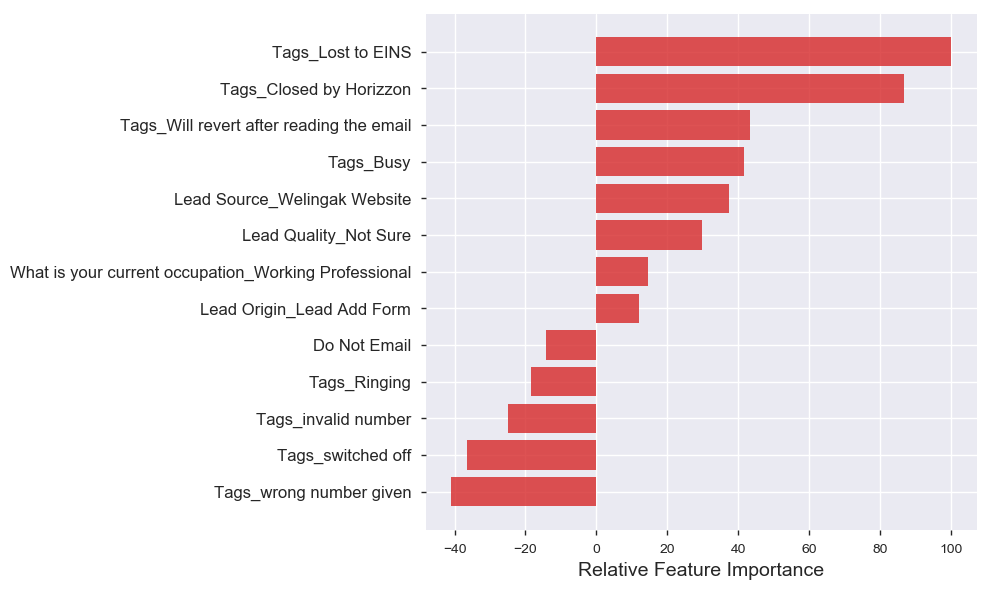

In [1492]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

### Selecting Top 3 features which contribute most towards the probability of a lead getting converted

In [1493]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
6,Tags_Lost to EINS,100.00
5,Tags_Closed by Horizzon,86.68
8,Tags_Will revert after reading the email,43.22


## Conclusion

### After trying several models, we finally chose a model with the following characteristics:

 - <font color = blue>All variables have p-value < `0.05`. </font>
 - <font color = blue>All the features have very low VIF values, meaning, there is `hardly any muliticollinearity` among the features. This is also evident from the heat map.</font>
 - <font color = blue>The overall accuracy of `0.90672` at a probability threshold of 0.2 on the test dataset is also very acceptable.</font>
    

### Based on our model, some features are identified which contribute most to a Lead getting converted successfully.

#### The conversion probability of a lead increases with increase in values of the following features in descending order:

|Features with Positive Coefficient Values|
|-------------|
|Tags_Lost to EINS|
|Tags_Closed by Horizzon|
|Tags_Will revert after reading the email|
|Tags_Busy|
|Lead Source_Welingak Website|
|Lead Quality_Not Sure|
|What is your current occupation_Working Professional|
|Lead Origin_Lead Add From|

#### The conversion probability of a lead increases with decrease in values of the following features in descending order:

|Features with Negative Coefficient Values|
|----------|
|Tags_worng number ginen|
|Tags_switched off|
|Tag_invalid number|
|Tags_Ringing|
|Do Not Email|


*** Another point to note here is that, depending on the business requirement, we can increase or decrease the probability threshold value with in turn will decrease or increase the Sensitivity and increase or decrease the Specificity of the model. ***

*** High Sensitivity will ensure that almost all leads who are likely to Convert are correctly predicted where as high Specificity will ensure that leads that are on the brink of the probability of getting Converted or not are not selected. ***